   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">

</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">SOC AI Course </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Week2- Bonus</h1>
<h5 style="font-family: Georgia; color: black; text-align: center; ">Designer: <a href="mailto:mohammadamanlou2@gmail.com">Mohammad Amanlou</a>, <a href="mailto:mzmousavi9@gmail.com">Marziyeh Mousavi</a></h5>
</div>



   </html>

## Introduction

In this assignment, you will explore various loss functions and apply gradient descent methods to optimize these functions. The focus will be on the Diabetes dataset from the scikit-learn library, a well-known dataset in the machine learning community. This dataset consists of medical diagnostic measurements from numerous patients and is specifically designed to study diabetes progression. You will use these data points to predict the quantitative measure of disease progression one year after baseline, allowing you to practice regression analysis in a medical context.

### Important Notes

For this assignment, you are required to implement the functions in "Part 1: Functions’ Implementation" from scratch. The use of pre-built libraries such as PyTorch, TensorFlow, or similar for these specific tasks is prohibited.

### Dataset Description

The diabetes dataset consists of 442 instances with the following ten baseline variables:

1. **Age**: Age in years
2. **Sex**: Gender of the patient
3. **Body Mass Index (BMI)**: A measure of body fat based on height and weight
4. **Average Blood Pressure (BP)**: Mean blood pressure value
5. **Six blood serum measurements**:
   - **s1**: Total serum cholesterol (tc)
   - **s2**: Low-density lipoproteins (ldl)
   - **s3**: High-density lipoproteins (hdl)
   - **s4**: Total cholesterol / HDL ratio (tch)
   - **s5**: Possibly the logarithm of serum triglycerides level (ltg)
   - **s6**: Blood sugar level (glu)

The target variable is a quantitative measure of disease progression one year after baseline.

### Warm-Up

1. **Load the Diabetes Dataset**: Load the dataset provided by scikit-learn (scaled=False) or directly via a provided link.(https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)
2. **Display the First Ten Rows**: This will help you understand the structure and values of the dataset.
3. **Check Data Types**: Print the data types of each feature to ensure they are numeric, which is necessary for regression analysis.
4. **Handle Missing Values**: Check for any missing values in the dataset and handle them appropriately if any exist.
5. **Normalize the Features**: Normalize the features to ensure all are on a similar scale, which helps in improving the performance of the regression model.
6. **Split the Data**: Split the data into training and testing sets using a standard ratio (e.g., 95% training, 5% testing). Use sklearn's `train_test_split` function or an equivalent method ensuring a random split.
7. **Confirm the Split**: Display the number of instances in both the training and testing datasets to confirm the split.

### Main Task

#### Part 1: Functions’ Implementation

Implement the following functions from scratch:

- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors between actual and predicted values.
- **Mean Absolute Error (MAE)**: Measures the average of the absolute errors between actual and predicted values.
- **Root Mean Squared Error (RMSE)**: The square root of the average of the squared differences between actual and predicted values.
- **R² Score (Coefficient of Determination)**: Measures the proportion of the variance in the dependent variable that is predictable from the independent variables.

#### Part 2: Building and Training the Linear Regression Model

Construct a regression model and train it using the diabetes dataset.

#### Part 3: Polynomial Regression

Create a polynomial regression model and evaluate its accuracy against the linear regression model.

#### Part 3: Model Evaluation

1. **Scatter Plot**: Compare the predicted values with the actual progression measures using a scatter plot. The x-axis represents the actual values, and the y-axis represents the predicted values.
2. **Evaluate the Model**: Evaluate the regression model on the training and testing data using the following functions:
   - **MSE**
   - **MAE**
   - **RMSE**
   - **R² Score**

Fill in the table with the calculated metrics.

| Data Type/Optimizer | MSE  | MAE  | RMSE | R² Score |
|---------------------|------|------|------|----------|
| Train Set           |      |      |      |          |
| Test Set            |      |      |      |          |


#### Warm-Up

##### Load the Diabetes Dataset

In [169]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabet = load_diabetes(scaled=False)

diabetdf = pd.DataFrame(data=diabet.data, columns=diabet.feature_names)

diabetes_df['target'] = diabet.target
y=diabet.target
print("Shape of Sklearn Diabetes Data:", diabetdf.shape)

Shape of Sklearn Diabetes Data: (442, 10)


##### Display the First Ten Rows

In [170]:
print(diabetdf.head(10))

    age  sex   bmi     bp     s1     s2    s3    s4      s5    s6
0  59.0  2.0  32.1  101.0  157.0   93.2  38.0  4.00  4.8598  87.0
1  48.0  1.0  21.6   87.0  183.0  103.2  70.0  3.00  3.8918  69.0
2  72.0  2.0  30.5   93.0  156.0   93.6  41.0  4.00  4.6728  85.0
3  24.0  1.0  25.3   84.0  198.0  131.4  40.0  5.00  4.8903  89.0
4  50.0  1.0  23.0  101.0  192.0  125.4  52.0  4.00  4.2905  80.0
5  23.0  1.0  22.6   89.0  139.0   64.8  61.0  2.00  4.1897  68.0
6  36.0  2.0  22.0   90.0  160.0   99.6  50.0  3.00  3.9512  82.0
7  66.0  2.0  26.2  114.0  255.0  185.0  56.0  4.55  4.2485  92.0
8  60.0  2.0  32.1   83.0  179.0  119.4  42.0  4.00  4.4773  94.0
9  29.0  1.0  30.0   85.0  180.0   93.4  43.0  4.00  5.3845  88.0


##### Check Data Types

In [171]:
print(diabetdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB
None


##### Handle Missing Values

In [172]:
cols_with_missing = [col for col in diabetdf.columns if diabetdf[col].isnull().any()]
print(cols_with_missing)
# there is no columns with missing data

[]


##### Normalize the Features

In [173]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabet_scaled = scaler.fit_transform(diabetdf)
asli = pd.DataFrame(diabet_scaled, columns=diabetdf.columns)
print(asli)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1   -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2    1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897 -0.680245   
3   -1.872441 -0.938537 -0.243771 -0.770650  0.256292  0.525397 -0.757647   
4    0.113172 -0.938537 -0.764944  0.459841  0.082726  0.327890  0.171178   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.876870  1.065488  0.413360  1.256040 -0.119769 -0.053957 -0.602843   
438 -0.115937  1.065488 -0.334410 -1.422086  1.037341  1.664355 -0.602843   
439  0.876870  1.065488 -0.334410  0.363573 -0.785107 -0.290965 -0.525441   
440 -0.956004 -0.938537  0.821235  0.025550  0.343075  0.321306 -0.602843   
441 -0.956004 -0.938537 -1.535374 -1.711613  1.760535  0.584649  3.654268   

           s4        s5        s6  
0   -0.054499  0.418531 -0.370989  
1  

##### Split the Data

In [174]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(asli, y, train_size=0.95, test_size=0.05,random_state=42)

##### Confirm the Split

In [175]:
print("X_train shape is: ",X_train.shape)
print("X_valid shape is: ",X_valid.shape)
print("y_train shape is: ",y_train.shape)
print("y_valid shape is: ",y_valid.shape)

X_train shape is:  (419, 10)
X_valid shape is:  (23, 10)
y_train shape is:  (419,)
y_valid shape is:  (23,)


#### Main Task


##### Part 1: Functions’ Implementation
###### Mean Squared Error (MSE)

In [186]:
import numpy as np

def msee(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

###### Mean Absolute Error (MAE)

In [187]:
def maee(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

###### Root Mean Squared Error (RMSE)

In [188]:
import math

def rmsee(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

###### R² Score (Coefficient of Determination)

In [189]:
def r2e(y_true, y_pred):
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_res / ss_tot)

##### Part 2: Building and Training the Linear Regression Model


In [199]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
rmse = root_mean_squared_error(y_valid, y_pred)

#true value
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error::", rmse)
print("R-squared:", r2)

Mean Squared Error: 3516.1108664162234
Mean Absolute Error: 49.27832027864406
Root Mean Squared Error:: 59.29680317197735
R-squared: 0.5163792932946591


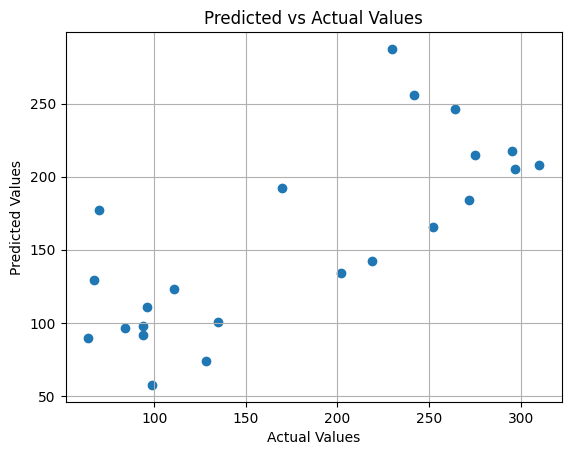

In [200]:
plt.scatter(y_valid, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()

In [203]:
#scratch function value
mse2 = msee(y_valid, y_pred)
mae2 = maee(y_valid, y_pred)
rmse2 = rmsee(y_valid, y_pred)
r22 = r2e(y_valid, y_pred)


print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error::", rmse2)
print("R-squared:", r22)

Mean Squared Error: 3516.1108664162234
Mean Absolute Error: 49.27832027864406
Root Mean Squared Error:: 59.29680317197735
R-squared: 0.5163792932946591


##### Part 3: Polynomial Regression

In [205]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_valid)


model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
rmse = root_mean_squared_error(y_valid, y_pred)

#true value
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error::", rmse)
print("R-squared:", r2)

Mean Squared Error: 4231.299534673276
Mean Absolute Error: 50.05757472826087
Root Mean Squared Error:: 65.04843990960333
R-squared: 0.4180092298038387


In [206]:
#scratch function value
mse2 = msee(y_valid, y_pred)
mae2 = maee(y_valid, y_pred)
rmse2 = rmsee(y_valid, y_pred)
r22 = r2e(y_valid, y_pred)

print("Mean Squared Error:", mse2)
print("Mean Absolute Error:", mae2)
print("Root Mean Squared Error::", rmse2)
print("R-squared:", r22)

Mean Squared Error: 4231.299534673276
Mean Absolute Error: 50.05757472826087
Root Mean Squared Error:: 65.04843990960333
R-squared: 0.4180092298038387


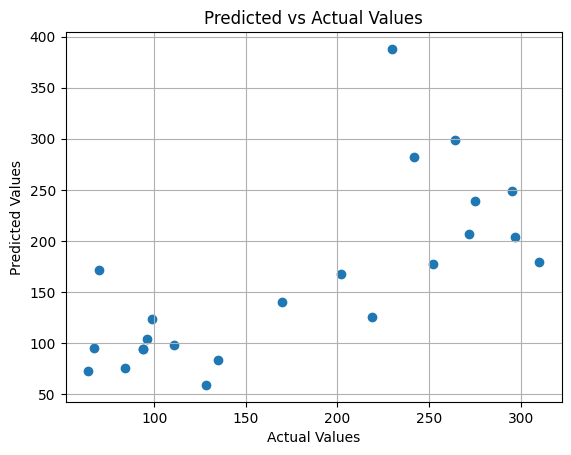

In [185]:
plt.scatter(y_valid, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.show()

###### Evaluate the Model